# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We start by getting the data, which is stored as a pkl (see combine_dataframes.ipynb file for pkl file creation). We then define our focus crimes, and ensure the data is in the correct formats. 

In [ ]:
df = pd.read_pickle('combined_df.pkl')

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 
                   'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

df['Date'] = pd.to_datetime(df['Date'])
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year

Now we the create the plot.

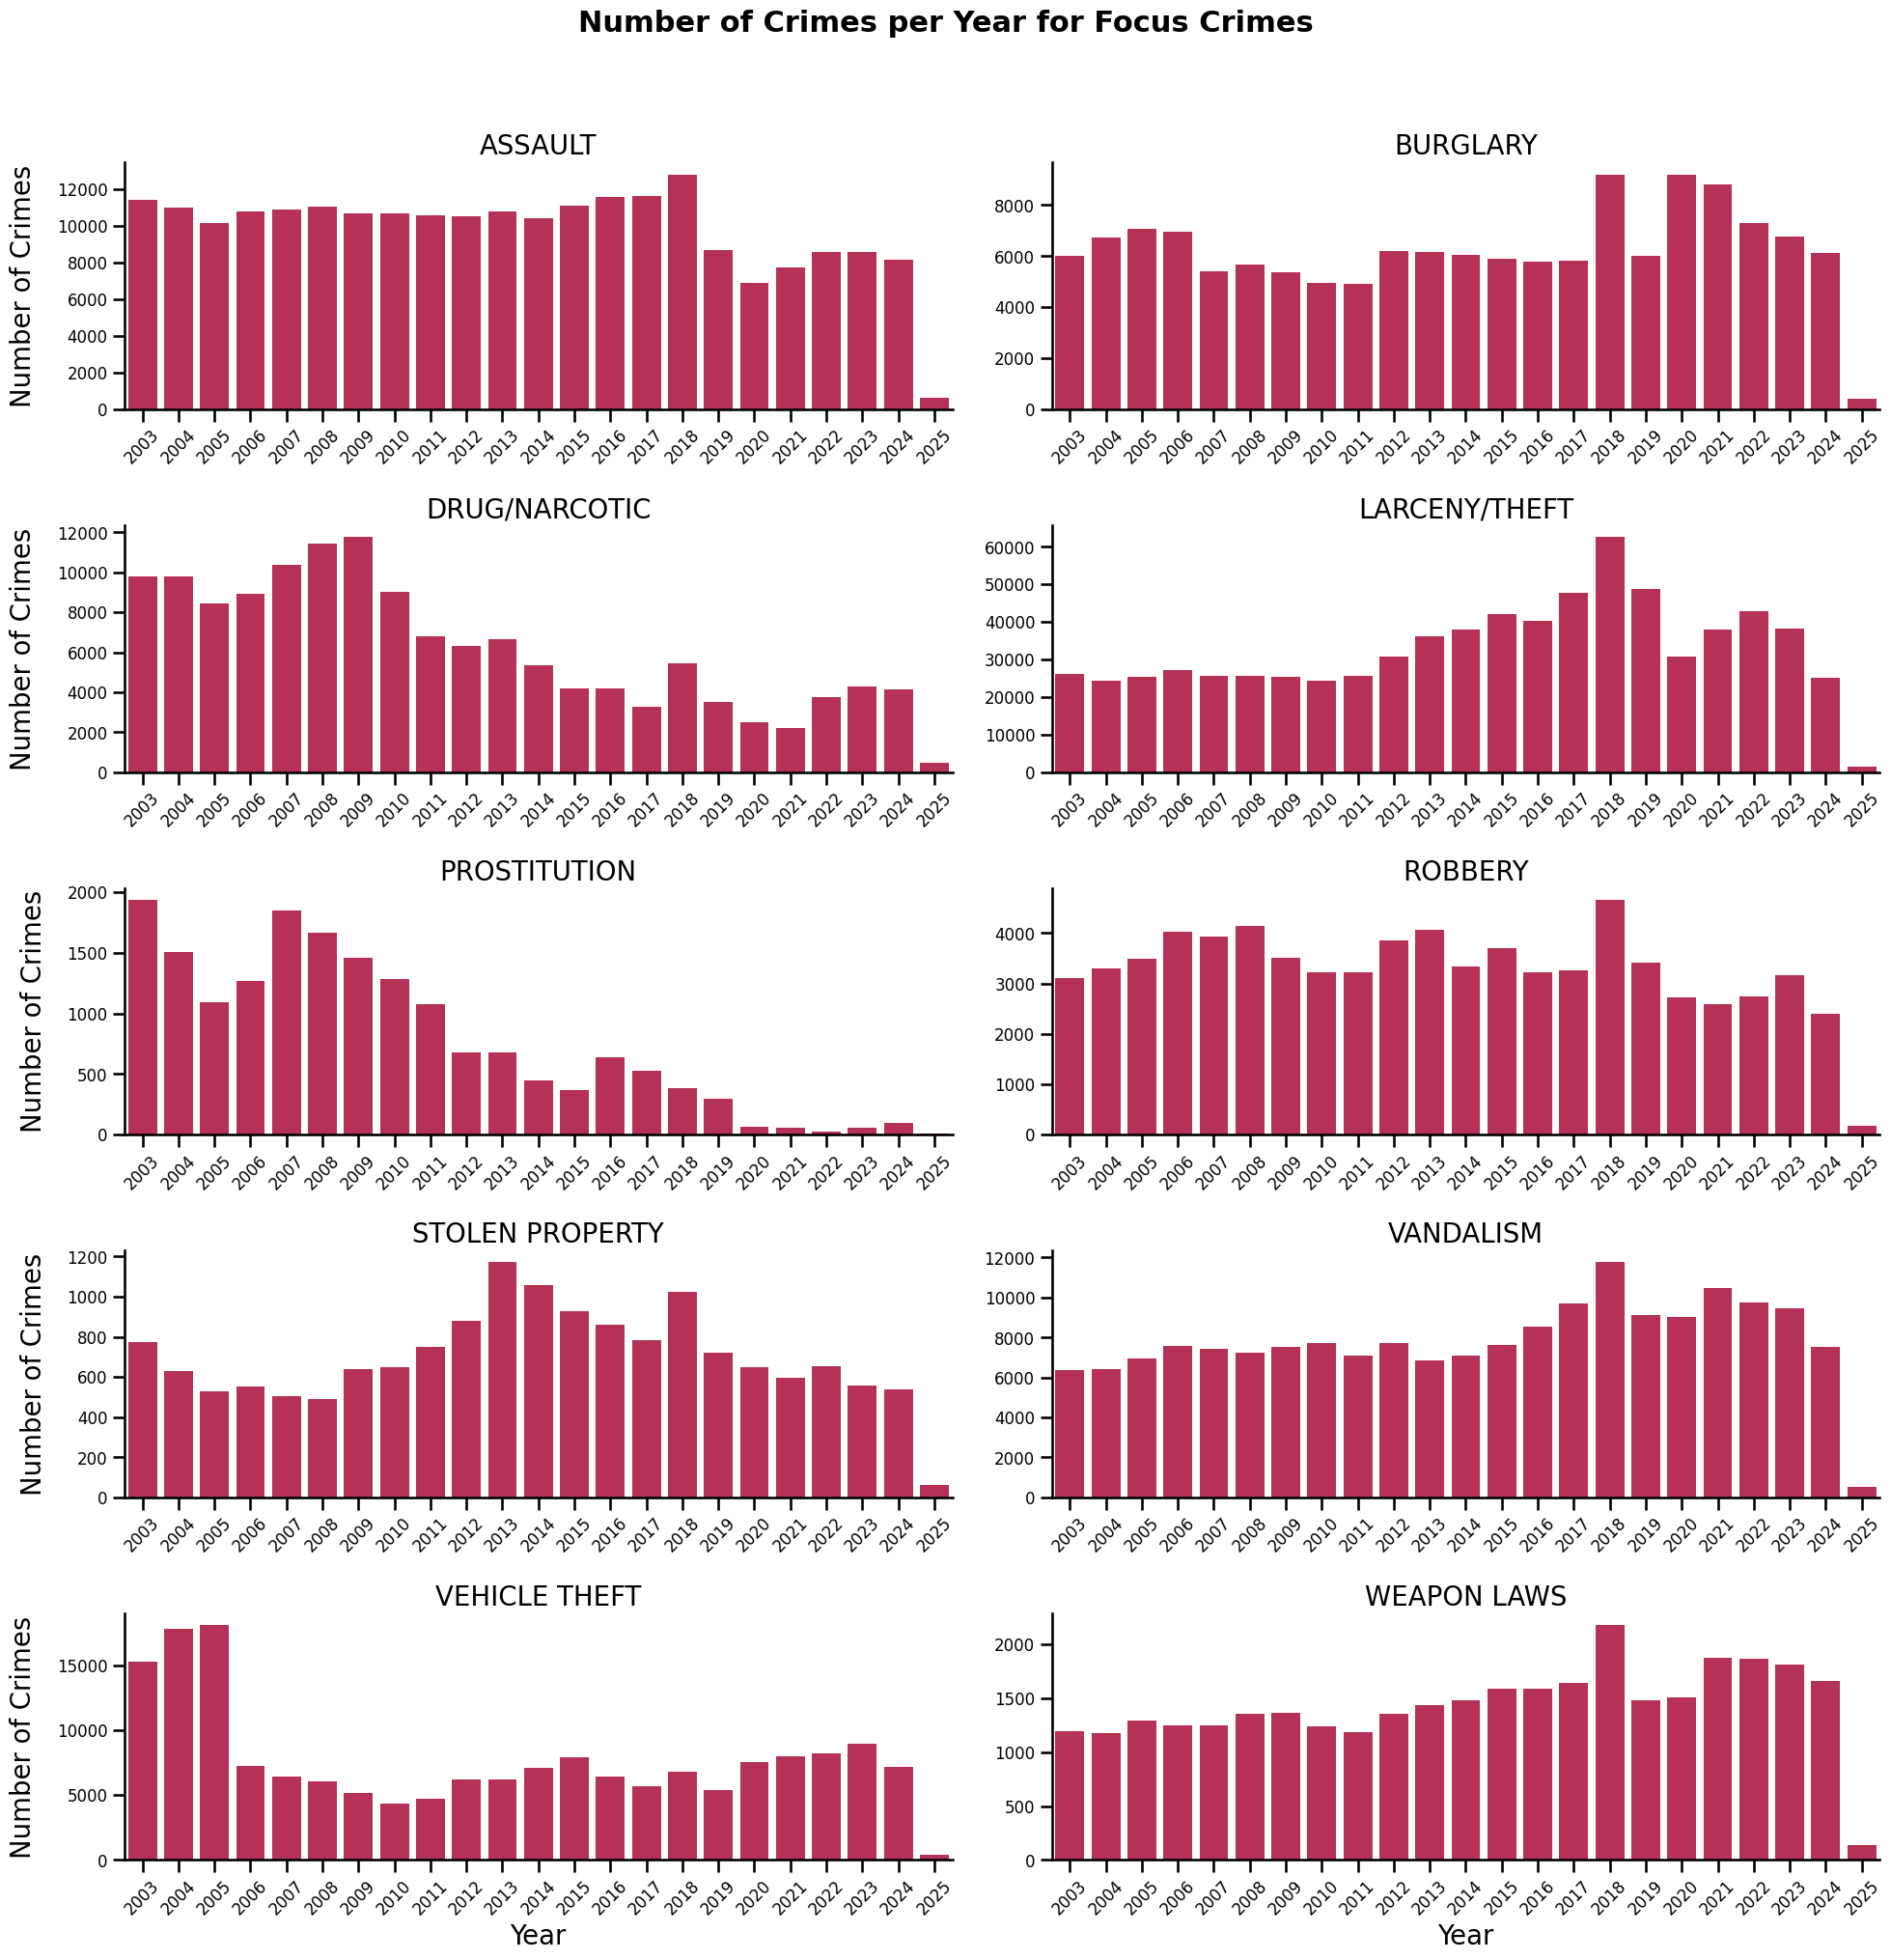

In [ ]:
# Set context to increase text sizes for a talk-like presentation style
sns.set_context("talk", font_scale=1.1)

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter the DataFrame to only include focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
                   'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()

# Extract the year from the 'Date' column
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year

# Group by 'Category' and 'Year' and count occurrences
crime_counts = (
    focuscrime_df.groupby(['Category', 'Year'])
    .size()
    .reset_index(name='Count')
)

# Create a facet grid with 2 columns and free y-axis for each plot (sharey=False)
g = sns.FacetGrid(crime_counts, col="Category", col_wrap=2, height=4, aspect=2.5, sharey=False, sharex=False)

# Extract a single color from the 'rocket' palette
rocket_color = sns.color_palette("rocket", 1)[0]

# Use map_dataframe to pass the data subset to each facet and create a barplot with the chosen color
g.map_dataframe(sns.barplot, x="Year", y="Count", color=rocket_color)

# Customize the axis labels and facet titles
g.set_axis_labels("Year", "Number of Crimes")
g.set_titles("{col_name}")

# Increase space between the y-axis title and the plot
for ax in g.axes.flat:
    ax.yaxis.labelpad = 15

# Tick label sizes on each axis
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelsize=12)

# Rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
# Title
g.fig.suptitle("Number of Crimes per Year for Focus Crimes", fontsize=22, fontweight='bold', y=1.02)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")
* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.


# Answers to questions related to the main video-lecture on Data vizualization: 


What is the difference between data and metadata? How does that relate to the GPS tracks-example?

"Data" is non-abstract observations, also referred to as raw data. This could refer to a file of text and numbers. In the GPS-tracks example from the video, this would be the GPS data from the "Garmin Connect" file.
"Metadata", on the other hand, is data about data. It adds richness by providing context for raw data. In the GPS-tracks example, it is the details about the trip from the GPS raw data.

Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.

Yes, it makes sense that the human eye is designed to evaluate information and surroundings for survival. This could reflect "data analysis". Eventually, it is also the human eye and intuition that evaluates the plots created with data vizualization tools. 

The human eye (or brain) is good at spotting patterns and trends [2]. An example would be reading a book or text, where a spelling mistake would be easily noticed, as it deviates from the usual patterns of how words and sentences are structured. In line with this logic, plots with observable trends/patterns/clusters are easily evaluated.

Something that is difficult to notice is small color/size differences. Slighty different shades of a color could be difficult to tell apart. This might be due to the optical illusions the human eye can experience when evaluating colors.  For instance, Simultaneous Contrast Illusion (Michel-Eugène Chevreul, 1839), where  colors appear different depending on the colors surrounding them [1].

Simpson's paradox is hard to explain. Come up with your own example - or find one online.

Simpson's paradox is when a pattern you see in separate groups disappears (or reverses) when you combine the groups.
An example from (https://brilliant.org/wiki/simpsons-paradox/) states that two students complete assignments over the weekend. Student 1 has a higher accuracy than student 2 on both days. But when you combine the groups, student 1 has a higher total percentage. This is due to student 1 completing more tasks than student 2 over the weekend in total [3].

In your own words, explain the differnece between exploratory and explanatory data analysis.


Exploratory: Examine unexpected trends/patterns that appear when you visualize the data. 

Explanatory: Focused on communicating information or results found from data analysis.


[1] Mattson, M. P., & Chang, L. (2014). Superior pattern processing is the essence of the evolved human brain. Frontiers in Neuroscience, 8(8 AUG), 265. https://doi.org/10.3389/FNINS.2014.00265

[2] Kuehni, R. G. (2002). Michel-Eugène Chevreul: From laws and principles to the production of colour plates. Color Research & Application, 27(1), 4–14. https://doi.org/10.1002/COL.10000

[3] https://brilliant.org/wiki/simpsons-paradox/

# Answers to questions related to the video on "Nice plots"









## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 